In [1]:
!pip install -U scikit-fuzzy
    

Requirement already up-to-date: scikit-fuzzy in c:\users\aditya ranjan roy\anaconda3\lib\site-packages (0.4.2)


In [2]:
import pandas as pd
import re
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
start = time.time()

In [3]:
traindata=pd.read_csv(r"C:\Users\ADITYA RANJAN ROY\Downloads\archive (1)\fuzzylogic.csv",encoding='ISO-8859-1')  


In [4]:
doc=traindata.TweetText
print(len(doc))
sentidoc=traindata.Sentiment


999


In [5]:
x_p = np.arange(0, 1, 0.1)
x_n = np.arange(0, 1, 0.1)
x_op = np.arange(0, 10, 1)


In [6]:
p_lo = fuzz.trimf(x_p, [0, 0, 0.5])
p_md = fuzz.trimf(x_p, [0, 0.5, 1])
p_hi = fuzz.trimf(x_p, [0.5, 1, 1])
n_lo = fuzz.trimf(x_n, [0, 0, 0.5])
n_md = fuzz.trimf(x_n, [0, 0.5, 1])
n_hi = fuzz.trimf(x_n, [0.5, 1, 1])
op_Neg = fuzz.trimf(x_op, [0, 0, 5])  # Scale : Neg Neu Pos
op_Neu = fuzz.trimf(x_op, [0, 5, 10])
op_Pos = fuzz.trimf(x_op, [5, 10, 10])


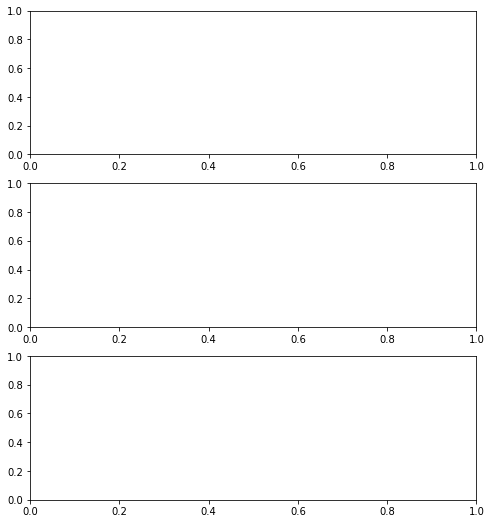

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

In [8]:
ax0.plot(x_p, p_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_p, p_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_p, p_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Pos')
ax0.legend()

In [9]:
ax1.plot(x_n, n_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(x_n, n_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_n, n_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('Neg')
ax1.legend()

In [10]:
ax2.plot(x_op, op_Pos, 'b', linewidth=1.5, label='Negative')
ax2.plot(x_op, op_Neu, 'g', linewidth=1.5, label='Neutral')
ax2.plot(x_op, op_Neg, 'r', linewidth=1.5, label='Positive')
ax2.set_title('Output')
ax2.legend()

In [11]:
tweets=[]
senti=[]
sentiment=[]
sentiment_doc=[]
sentiment_or=[]
sentiment_fuzzy=[]

In [12]:
for j in range(len(doc)):
    str1=traindata.TweetText[j]
    str2=str(str1).lower()
    tweets.append(str2)   # converted into lower case
    senti.append(traindata.Sentiment[j])


In [13]:
def decontracted(phrase):   # text pre-processing 
        # specific
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"@", "" , phrase)         # removal of @
        phrase =  re.sub(r"http\S+", "", phrase)   # removal of URLs
        phrase = re.sub(r"#", "", phrase)          # hashtag processing
    
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        return phrase

In [14]:
for k in range(len(doc)):
    tweets[k]=decontracted(tweets[k])

In [15]:
sid = SentimentIntensityAnalyzer()

1 when modi promised âminimum government maximum governanceâ expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples {'neg': 0.065, 'neu': 0.781, 'pos': 0.154, 'compound': 0.5267}

Positive Score for each  tweet :
0.2

Negative Score for each  tweet :
0.1

Firing Strength of Negative (wneg): 0.2
Firing Strength of Neutral (wneu): 0.6
Firing Strength of Positive (wpos): 0.4

Resultant consequents MFs:
op_activation_low: [0.2 0.2 0.2 0.2 0.2 0.  0.  0.  0.  0. ]
op_activation_med: [0.  0.2 0.4 0.6 0.6 0.6 0.6 0.6 0.4 0.2]
op_activation_high: [0.  0.  0.  0.  0.  0.  0.2 0.4 0.4 0.4]

Aggregated Output: [0.2 0.2 0.4 0.6 0.6 0.6 0.6 0.6 0.4 0.4]

Defuzzified Output: 4.88

Output after Defuzzification: Neutral
Doc sentiment: -1

2 talk all the nonsense and continue all the drama will vote for modi  {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.4019}

Positive Score for each  tweet :


Firing Strength of Negative (wneg): 0.0
Firing Strength of Neutral (wneu): 0.6
Firing Strength of Positive (wpos): 0.4

Resultant consequents MFs:
op_activation_low: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
op_activation_med: [0.  0.2 0.4 0.6 0.6 0.6 0.6 0.6 0.4 0.2]
op_activation_high: [0.  0.  0.  0.  0.  0.  0.2 0.4 0.4 0.4]

Aggregated Output: [0.  0.2 0.4 0.6 0.6 0.6 0.6 0.6 0.4 0.4]

Defuzzified Output: 4.98

Output after Defuzzification: Neutral
Doc sentiment: 0

15 one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his campaign  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4939}

Positive Score for each  tweet :
0.2

Negative Score for each  tweet :
0.0

Firing Strength of Negative (wneg): 0.0
Firing Strength of Neutral (wneu): 0.6
Firing Strength of Positive (wpos): 0.4

Resultant consequents MFs:
op_activation_low: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
op_activation_med: [0.  0.2 0.4 0.6 0.6 0.6 0.6 0.6 0.4 0.2]
op_activation

C:\Users\ADITYA RANJAN ROY\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Firing Strength of Negative (wneg): 0.2
Firing Strength of Neutral (wneu): 0.8
Firing Strength of Positive (wpos): 0.2

Resultant consequents MFs:
op_activation_low: [0.2 0.2 0.2 0.2 0.2 0.  0.  0.  0.  0. ]
op_activation_med: [0.  0.2 0.4 0.6 0.8 0.8 0.8 0.6 0.4 0.2]
op_activation_high: [0.  0.  0.  0.  0.  0.  0.2 0.2 0.2 0.2]

Aggregated Output: [0.2 0.2 0.4 0.6 0.8 0.8 0.8 0.6 0.4 0.2]

Defuzzified Output: 4.81

Output after Defuzzification: Neutral
Doc sentiment: 1

22 with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Positive Score for each  tweet :
0.0

Negative Score for each  tweet :
0.0

Firing Strength of Negative (wneg): 0.0
Firing Strength of Neutral (wneu): 1.0
Firing Strength of Positive (wpos): 0.0

Resultant consequents MFs:
op_activation_low: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
op_activation_med: [0.  0


Firing Strength of Negative (wneg): 0.2
Firing Strength of Neutral (wneu): 0.6
Firing Strength of Positive (wpos): 0.4

Resultant consequents MFs:
op_activation_low: [0.2 0.2 0.2 0.2 0.2 0.  0.  0.  0.  0. ]
op_activation_med: [0.  0.2 0.4 0.6 0.6 0.6 0.6 0.6 0.4 0.2]
op_activation_high: [0.  0.  0.  0.  0.  0.  0.2 0.4 0.4 0.4]

Aggregated Output: [0.2 0.2 0.4 0.6 0.6 0.6 0.6 0.6 0.4 0.4]

Defuzzified Output: 4.88

Output after Defuzzification: Neutral
Doc sentiment: -1

34 being born religion where female deities worshipped its misogynistic sadistic tradition and totally against point isits man made tradition and not written one not religious lunatic support own religion its repressive {'neg': 0.123, 'neu': 0.711, 'pos': 0.167, 'compound': 0.396}

Positive Score for each  tweet :
0.2

Negative Score for each  tweet :
0.1

Firing Strength of Negative (wneg): 0.2
Firing Strength of Neutral (wneu): 0.6
Firing Strength of Positive (wpos): 0.4

Resultant consequents MFs:
op_activation_lo

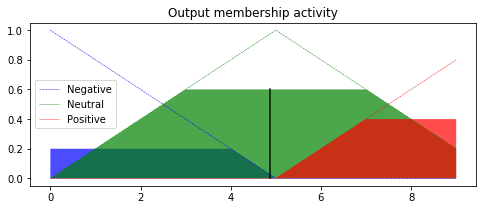

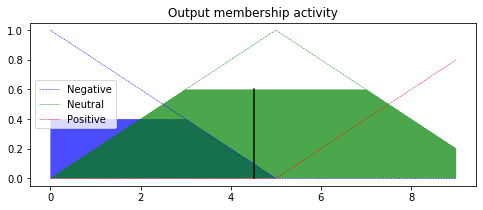

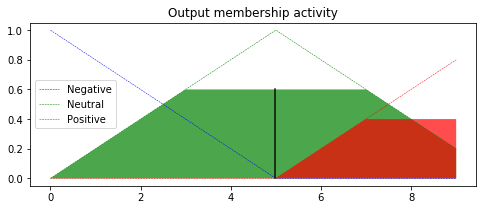

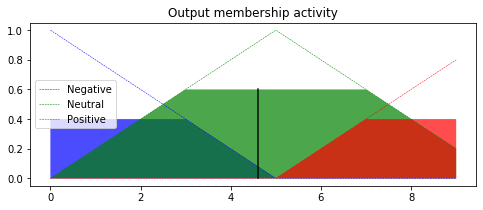

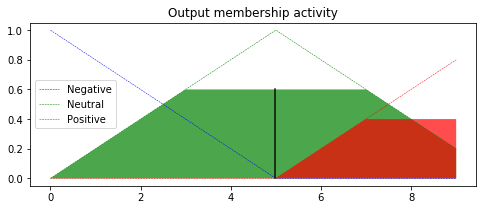

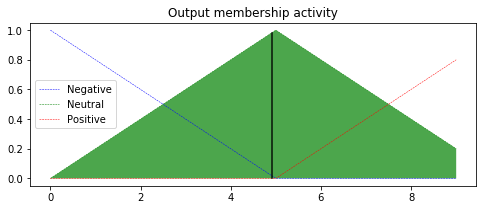

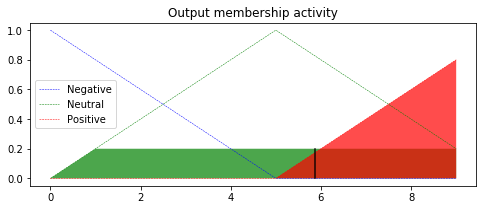

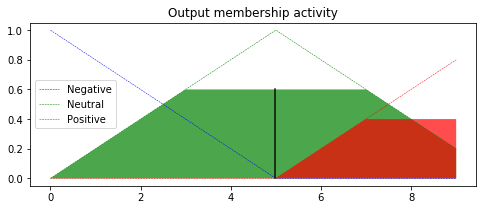

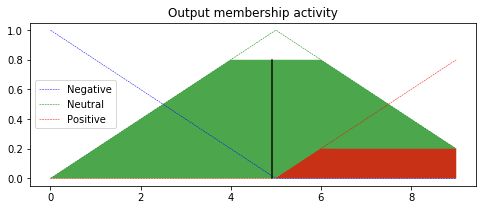

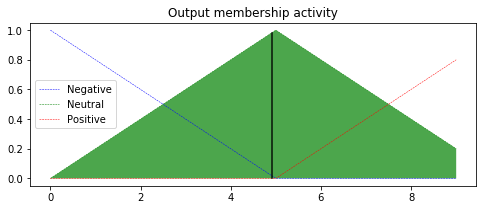

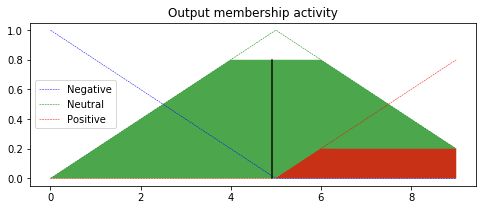

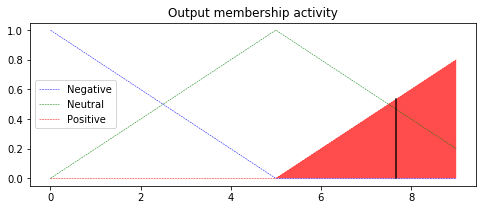

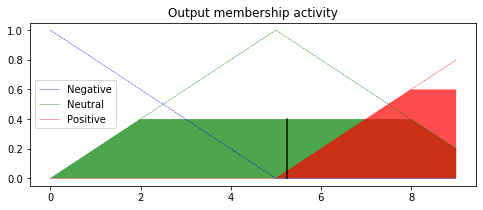

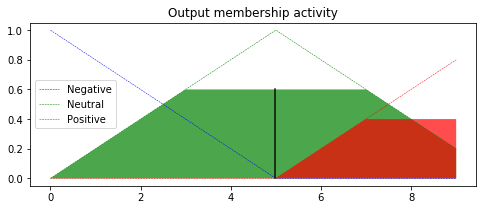

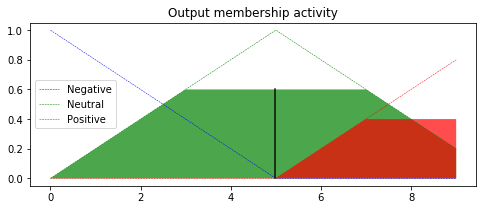

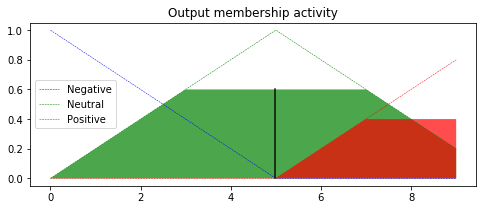

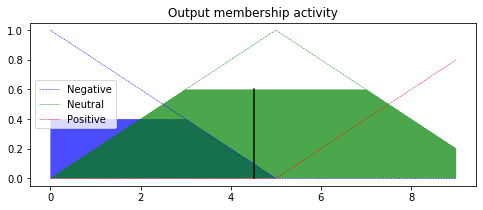

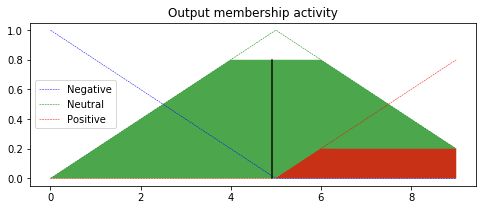

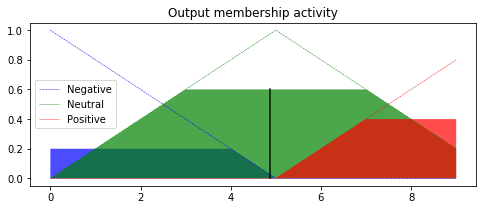

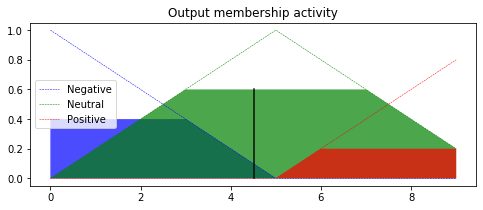

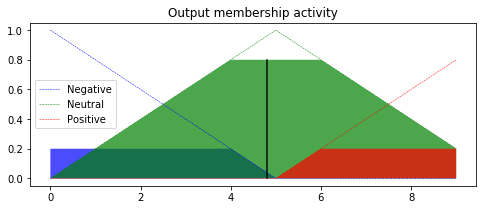

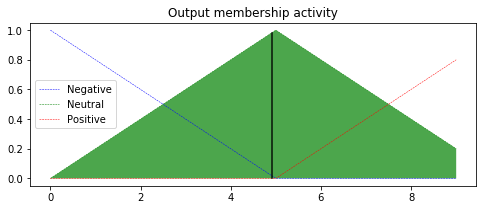

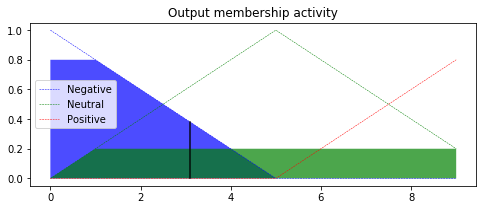

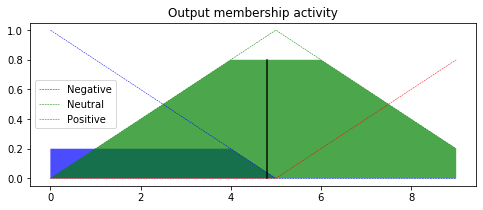

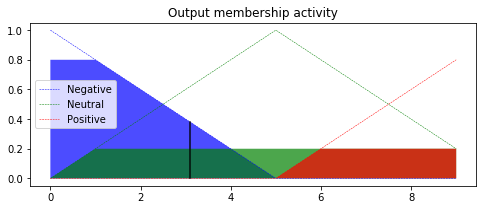

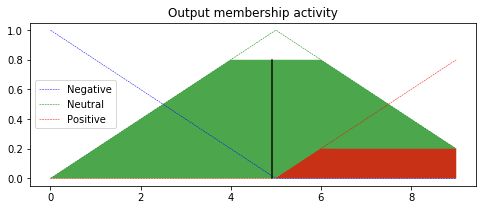

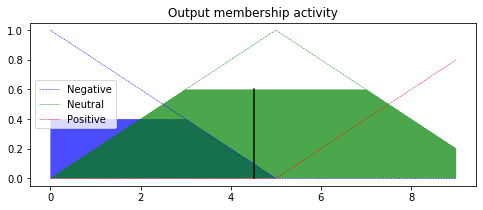

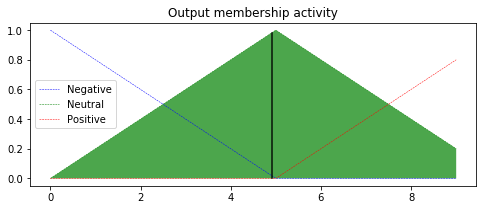

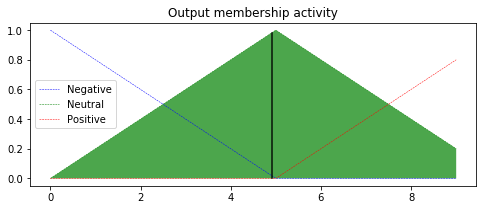

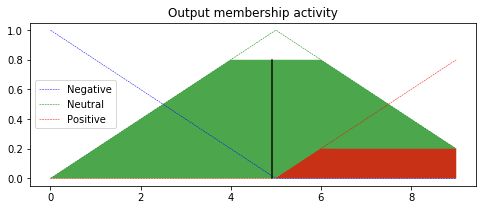

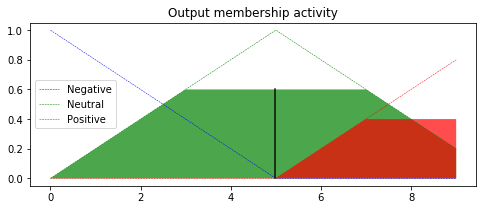

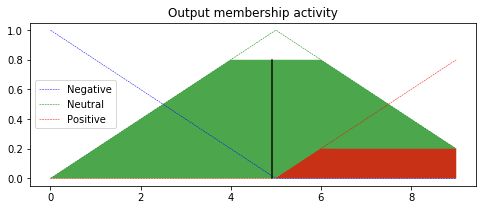

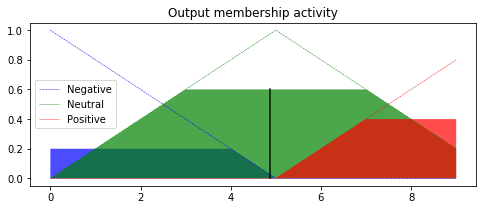

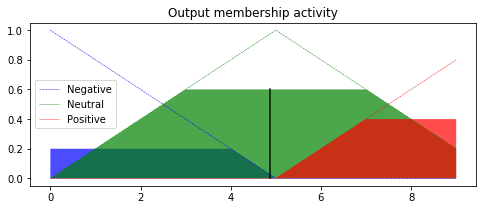

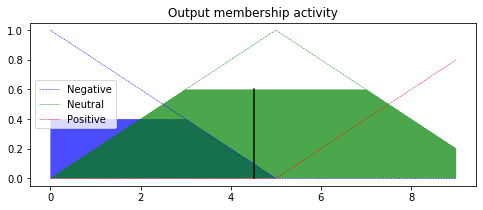

In [29]:
for j in range(35):
    sentiment_doc.append(senti[j])
    sentiment_or.append(senti[j])
    ss = sid.polarity_scores(tweets[j])
    posscore=ss['pos']
    negscore=ss['neg']
    neuscore=ss['neu']
    compoundscore=ss['compound']
   
    print(str(j+1)+" {:-<65} {}".format(tweets[j], str(ss))) 
    
    print("\nPositive Score for each  tweet :")    
    if (posscore==1):
        posscore=0.9 
    else:
        posscore=round(posscore,1)
    print(posscore)

    print("\nNegative Score for each  tweet :")
    if (negscore==1):
        negscore=0.9
    else:
        negscore=round(negscore,1)
    print(negscore)

# We need the activation of our fuzzy membership functions at these values.
    p_level_lo = fuzz.interp_membership(x_p, p_lo, posscore)
    p_level_md = fuzz.interp_membership(x_p, p_md, posscore)
    p_level_hi = fuzz.interp_membership(x_p, p_hi, posscore)
    
    n_level_lo = fuzz.interp_membership(x_n, n_lo, negscore)
    n_level_md = fuzz.interp_membership(x_n, n_md, negscore)
    n_level_hi = fuzz.interp_membership(x_n, n_hi, negscore)
    
    # Now we take our rules and apply them. Rule 1 concerns bad food OR nice.
    # The OR operator means we take the maximum of these two.
    active_rule1 = np.fmin(p_level_lo, n_level_lo)
    active_rule2 = np.fmin(p_level_md, n_level_lo)
    active_rule3 = np.fmin(p_level_hi, n_level_lo)
    active_rule4 = np.fmin(p_level_lo, n_level_md)
    active_rule5 = np.fmin(p_level_md, n_level_md)
    active_rule6 = np.fmin(p_level_hi, n_level_md)
    active_rule7 = np.fmin(p_level_lo, n_level_hi)
    active_rule8 = np.fmin(p_level_md, n_level_hi)
    active_rule9 = np.fmin(p_level_hi, n_level_hi)
    
    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    
    n1=np.fmax(active_rule4,active_rule7)
    n2=np.fmax(n1,active_rule8)     
    op_activation_lo = np.fmin(n2,op_Neg)
    
    neu1=np.fmax(active_rule1,active_rule5)
    neu2=np.fmax(neu1,active_rule9)     
    op_activation_md = np.fmin(neu2,op_Neu)
    
    p1=np.fmax(active_rule2,active_rule3)
    p2=np.fmax(p1,active_rule6)   
    op_activation_hi = np.fmin(p2,op_Pos)
    
    op0 = np.zeros_like(x_op)
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(op_activation_lo,
                         np.fmax(op_activation_md, op_activation_hi))
    
    # Calculate defuzzified result
    op = fuzz.defuzz(x_op, aggregated, 'centroid')
    output=round(op,2)

    op_activation = fuzz.interp_membership(x_op, aggregated, op)  # for plot

#     Visualize Aggregated Membership
#    fig, ax0 = plt.subplots(figsize=(8, 3))
#    
#    ax0.plot(x_op, op_Neg, 'b', linewidth=0.5, linestyle='--',label= 'Negative')
#    ax0.plot(x_op, op_Neu, 'g', linewidth=0.5, linestyle='--',label= 'Neutral')
#    ax0.plot(x_op, op_Pos, 'r', linewidth=0.5, linestyle='--',label= 'Positive')
#    ax0.fill_between(x_op, op0, aggregated, facecolor='Orange', alpha=0.7)
#    ax0.plot([op, op], [0, op_activation], 'k', linewidth=1.5, alpha=0.9)
#    ax0.set_title('Aggregated membership and result (line)')
#    ax0.legend()
    
#    # Turn off top/right axes
#    for ax in (ax0,):
#        ax.spines['top'].set_visible(False)
#        ax.spines['right'].set_visible(False)
#        ax.get_xaxis().tick_bottom()
#        ax.get_yaxis().tick_left()
#    
#    plt.tight_layout()
    
    # Visualize Output Membership
    fig, ax0 = plt.subplots(figsize=(8, 3))
    
    ax0.fill_between(x_op, op0, op_activation_lo, facecolor='b', alpha=0.7)
    ax0.plot(x_op, op_Neg, 'b', linewidth=0.5, linestyle='--',label= 'Negative' )
    ax0.fill_between(x_op, op0, op_activation_md, facecolor='g', alpha=0.7)
    ax0.plot(x_op, op_Neu, 'g', linewidth=0.5, linestyle='--', label='Neutral')
    ax0.fill_between(x_op, op0, op_activation_hi, facecolor='r', alpha=0.7)
    ax0.plot(x_op, op_Pos, 'r', linewidth=0.5, linestyle='--', label='Positive')
    ax0.plot([op, op], [0, op_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title('Output membership activity')
    ax0.legend()
#    
#    # Turn off top/right axes
#    for ax in (ax0,):
#        ax.spines['top'].set_visible(False)
#        ax.spines['right'].set_visible(False)
#        ax.get_xaxis().tick_bottom()
#        ax.get_yaxis().tick_left()
#    
#    plt.tight_layout()       
       
    print("\nFiring Strength of Negative (wneg): "+str(round(n2,4)))
    print("Firing Strength of Neutral (wneu): "+str(round(neu2,4)))
    print("Firing Strength of Positive (wpos): "+str(round(p2,4)))
    
    print("\nResultant consequents MFs:" )
    print("op_activation_low: "+str(op_activation_lo))
    print("op_activation_med: "+str(op_activation_md))
    print("op_activation_high: "+str(op_activation_hi))
    
    print("\nAggregated Output: "+str(aggregated))

    print("\nDefuzzified Output: "+str(output))
    sentiment_fuzzy.append(output/10)

# Scale : Neg Neu Pos   
    if 0<(output)<3.33:    # R
        print("\nOutput after Defuzzification: Negative")
        sentiment.append("Negative")
        
    elif 3.34<(output)<6.66:
        print("\nOutput after Defuzzification: Neutral")
        sentiment.append("Neutral")
   
    elif 6.67<(output)<10:
        print("\nOutput after Defuzzification: Positive")
        sentiment.append("Positive")
        
    print("Doc sentiment: " +str(senti[j])+"\n")    

In [30]:
traindata=pd.concat([traindata,pd.Series(sentiment_fuzzy)],axis=1)

In [31]:
traindata.rename(columns={traindata.columns[2]:"sentiment_fuzzy"},inplace=True)
traindata[['TweetText','sentiment_fuzzy']]

,TweetText,sentiment_fuzzy
0,when modi promised âminimum government maxim...,0.488
1,talk all the nonsense and continue all the dra...,0.452
2,what did just say vote for modi welcome bjp t...,0.498
3,asking his supporters prefix chowkidar their n...,0.461
4,answer who among these the most powerful world...,0.498
...,...,...
994,modis rise incredibly inspirational its remind...,NaN
995,another meltdown india which will further rejo...,NaN
996,there are two reasons for atmosphere hatred cr...,NaN
997,modi has wiped out the small micro industries ...,NaN


# Normalisation

In [32]:
import nltk

In [33]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [34]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
df = pd.read_csv(r"C:\Users\ADITYA RANJAN ROY\Downloads\archive (1)\fuzzylogic.csv", usecols=['TweetText'])
af=pd.read_csv(r"C:\Users\ADITYA RANJAN ROY\Downloads\archive (2)\word_sentiment.csv",encoding='ISO-8859-1')
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in df['TweetText']]
df["preprocess_txt"] = preprocess_tag
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))
neg_words =[]
pos_words=[]
for i in af.index:
    neg_words.append(af['Negative Sense Word List'][i])
    pos_words.append(af['Positive Sense Word List'][i])
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg
df['sentiment'] = ((round((df['pos_count'] - df['neg_count']) / df['total_len'], 2))+1)/(2)
df.head(15)

,TweetText,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,when modi promised “minimum government maximum...,"[modi, promised, minimum, government, maximum,...",21,6,1,0.620
1,talk all the nonsense and continue all the dra...,"[talk, nonsense, continue, drama, vote, modi]",6,0,1,0.415
2,what did just say vote for modi welcome bjp t...,"[say, vote, modi, welcome, bjp, told, rahul, m...",13,5,0,0.690
3,asking his supporters prefix chowkidar their n...,"[asking, supporter, prefix, chowkidar, name, m...",19,4,4,0.500
4,answer who among these the most powerful world...,"[answer, among, powerful, world, leader, today...",10,3,0,0.650
5,kiya tho refresh maarkefir comment karo,"[kiya, tho, refresh, maarkefir, comment, karo]",6,1,0,0.585
6,surat women perform yagna seeks divine grace f...,"[surat, woman, perform, yagna, seek, divine, g...",10,4,1,0.650
7,this comes from cabinet which has scholars lik...,"[come, cabinet, scholar, like, modi, smriti, h...",9,2,0,0.610
8,with upcoming election india saga going import...,"[upcoming, election, india, saga, going, impor...",21,9,0,0.715
9,gandhi was gay does modi,"[gandhi, gay, modi]",3,1,0,0.665


In [35]:
traindata['nor_sentiment']=df['sentiment']

In [36]:
traindata[['TweetText','sentiment_fuzzy','nor_sentiment']]

,TweetText,sentiment_fuzzy,nor_sentiment
0,when modi promised âminimum government maxim...,0.488,0.620
1,talk all the nonsense and continue all the dra...,0.452,0.415
2,what did just say vote for modi welcome bjp t...,0.498,0.690
3,asking his supporters prefix chowkidar their n...,0.461,0.500
4,answer who among these the most powerful world...,0.498,0.650
...,...,...,...
994,modis rise incredibly inspirational its remind...,NaN,0.645
995,another meltdown india which will further rejo...,NaN,0.530
996,there are two reasons for atmosphere hatred cr...,NaN,0.500
997,modi has wiped out the small micro industries ...,NaN,0.540


# Semi Normalisation

In [37]:
df['semi_sentiment'] = ((round(df['pos_count'] / (df['neg_count']+1), 2))-0)/(10-0)

In [38]:
df.head(15)

,TweetText,preprocess_txt,total_len,pos_count,neg_count,sentiment,semi_sentiment
0,when modi promised “minimum government maximum...,"[modi, promised, minimum, government, maximum,...",21,6,1,0.620,0.30
1,talk all the nonsense and continue all the dra...,"[talk, nonsense, continue, drama, vote, modi]",6,0,1,0.415,0.00
2,what did just say vote for modi welcome bjp t...,"[say, vote, modi, welcome, bjp, told, rahul, m...",13,5,0,0.690,0.50
3,asking his supporters prefix chowkidar their n...,"[asking, supporter, prefix, chowkidar, name, m...",19,4,4,0.500,0.08
4,answer who among these the most powerful world...,"[answer, among, powerful, world, leader, today...",10,3,0,0.650,0.30
5,kiya tho refresh maarkefir comment karo,"[kiya, tho, refresh, maarkefir, comment, karo]",6,1,0,0.585,0.10
6,surat women perform yagna seeks divine grace f...,"[surat, woman, perform, yagna, seek, divine, g...",10,4,1,0.650,0.20
7,this comes from cabinet which has scholars lik...,"[come, cabinet, scholar, like, modi, smriti, h...",9,2,0,0.610,0.20
8,with upcoming election india saga going import...,"[upcoming, election, india, saga, going, impor...",21,9,0,0.715,0.90
9,gandhi was gay does modi,"[gandhi, gay, modi]",3,1,0,0.665,0.10


In [39]:
traindata['semi_nor_sentiment']=df['semi_sentiment']

In [40]:
traindata[['TweetText','sentiment_fuzzy','nor_sentiment','semi_nor_sentiment']]

,TweetText,sentiment_fuzzy,nor_sentiment,semi_nor_sentiment
0,when modi promised âminimum government maxim...,0.488,0.620,0.30
1,talk all the nonsense and continue all the dra...,0.452,0.415,0.00
2,what did just say vote for modi welcome bjp t...,0.498,0.690,0.50
3,asking his supporters prefix chowkidar their n...,0.461,0.500,0.08
4,answer who among these the most powerful world...,0.498,0.650,0.30
...,...,...,...,...
994,modis rise incredibly inspirational its remind...,NaN,0.645,0.22
995,another meltdown india which will further rejo...,NaN,0.530,0.10
996,there are two reasons for atmosphere hatred cr...,NaN,0.500,0.05
997,modi has wiped out the small micro industries ...,NaN,0.540,0.10


# TextBlob

In [41]:
from textblob import TextBlob
df['preprocess_txt']=df['preprocess_txt'].apply(lambda x: ' '.join(x))
df.head(5)

,TweetText,preprocess_txt,total_len,pos_count,neg_count,sentiment,semi_sentiment
0,when modi promised “minimum government maximum...,modi promised minimum government maximum gover...,21,6,1,0.620,0.30
1,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi,6,0,1,0.415,0.00
2,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...,13,5,0,0.690,0.50
3,asking his supporters prefix chowkidar their n...,asking supporter prefix chowkidar name modi gr...,19,4,4,0.500,0.08
4,answer who among these the most powerful world...,answer among powerful world leader today trump...,10,3,0,0.650,0.30


In [42]:
polarity_score=[]
count=-1

for i in range(0,df.shape[0]):
    score=TextBlob(df.iloc[i][1])
    score1=score.sentiment[0]
    polarity_score.append((score1+1)/2)

In [43]:
df['b_sentiment']=polarity_score

In [44]:
df.head(5)

,TweetText,preprocess_txt,total_len,pos_count,neg_count,sentiment,semi_sentiment,b_sentiment
0,when modi promised “minimum government maximum...,modi promised minimum government maximum gover...,21,6,1,0.620,0.30,0.350000
1,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi,6,0,1,0.415,0.00,0.500000
2,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...,13,5,0,0.690,0.50,0.741667
3,asking his supporters prefix chowkidar their n...,asking supporter prefix chowkidar name modi gr...,19,4,4,0.500,0.08,0.516667
4,answer who among these the most powerful world...,answer among powerful world leader today trump...,10,3,0,0.650,0.30,0.650000


In [45]:
traindata['textblob_sentiment']=df['b_sentiment']
traindata[['TweetText','sentiment_fuzzy','nor_sentiment','semi_nor_sentiment','textblob_sentiment']]

,TweetText,sentiment_fuzzy,nor_sentiment,semi_nor_sentiment,textblob_sentiment
0,when modi promised âminimum government maxim...,0.488,0.620,0.30,0.350000
1,talk all the nonsense and continue all the dra...,0.452,0.415,0.00,0.500000
2,what did just say vote for modi welcome bjp t...,0.498,0.690,0.50,0.741667
3,asking his supporters prefix chowkidar their n...,0.461,0.500,0.08,0.516667
4,answer who among these the most powerful world...,0.498,0.650,0.30,0.650000
...,...,...,...,...,...
994,modis rise incredibly inspirational its remind...,NaN,0.645,0.22,0.588542
995,another meltdown india which will further rejo...,NaN,0.530,0.10,0.354167
996,there are two reasons for atmosphere hatred cr...,NaN,0.500,0.05,0.500000
997,modi has wiped out the small micro industries ...,NaN,0.540,0.10,0.375000


In [46]:
for k in range(35):
    if(sentiment_doc[k]==sentiment_or[k]):
        count=count+1       
print("Accuracy is: "+ str(round(count/(35)*100,2)))

Accuracy is: 97.14
